In [1]:
import pandas as pd
import numpy as np

import os

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

import scipy

import warnings
import itertools
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, f1_score, mean_absolute_percentage_error, r2_score

from pathlib import Path

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# path to project folder
# please change to your own
PATH = Path(os.getcwd()).parent

color_palette = ["#000","#778899"]

palette = sns.color_palette(color_palette)

bright_palette = sns.diverging_palette(145, 300, s=60, as_cmap=True)
bright_colours = sns.diverging_palette(145, 300, s=60)
sns.set_palette("Set1")

# Fidelity Results Compiled

In [3]:
datasets = ["breast_cancer", "compas", "diabetes", "income", "iris", "mushroom", "nursery"]
models = ["decision_tree", "logit", "nb"]
cls_xai = ["LIME", "SHAP", "LINDA", "ACV"]

data_names = {"breast_cancer":"Breast Cancer", "compas": "COMPAS", "diabetes":"Diabetes", "income": "Adult Income",
              "iris": "Iris", "mushroom": "Mushroom", "nursery": "Nursery"}

orig_data = pd.DataFrame()
cls_results = pd.DataFrame()

for data in datasets:
    for model in models:
        results = pd.read_csv(os.path.join(PATH, data, model, "results.csv"), sep = ";")
        
        accuracy = accuracy_score(results["Actual"], results["Prediction"])
        f1 = f1_score(results["Actual"], results["Prediction"])
        
        results["Model Accuracy"] = [accuracy]*results.shape[0]
        results["F1 Score"] = [f1]*results.shape[0]
        
        results["Model"] = [model]*results.shape[0]
        results["Dataset"] = [data_names[data]]*results.shape[0]
        results["Dataset Type"] = ["Classification"]*results.shape[0]
        
        orig_data = orig_data.append(results)
        cls_results = cls_results.append(results)

In [4]:
datasets = ["bike_sharing", "facebook", "housing", "real_estate", "solar_flare", "student_scores", "wine_quality"]
models = ["decision_tree", "lin_reg"]
reg_xai = ["LIME", "SHAP", "ACV"]

data_names = {"bike_sharing":"Bike Rentals", "facebook": "Facebook", "housing":"Housing", "real_estate": "Real Estate",
              "solar_flare": "Solar Flare", "student_scores": "Student Results", "wine_quality": "Wine Quality"}

reg_results = pd.DataFrame()

for data in datasets:
    for model in models:
        results = pd.read_csv(os.path.join(PATH, data, model, "results.csv"), sep = ";")
        
        mape = mean_absolute_percentage_error(results["Actual"], results["Prediction"])
        rsquared = r2_score(results["Actual"], results["Prediction"])
        
        results["MAPE"] = [mape]*results.shape[0]
        results["R-Squared"] = [rsquared]*results.shape[0]
        
        results["Model"] = [model]*results.shape[0]
        results["Dataset"] = [data_names[data]]*results.shape[0]
        results["Dataset Type"] = ["Regression"]*results.shape[0]
        
        orig_data = orig_data.append(results)
        reg_results = reg_results.append(results)

In [5]:
def prediction_type(row):
    if row['Dataset Type'] == "Classification":
        if row['Actual'] == 0 and row['Prediction'] == 0:
            return "True Negative"
        elif row['Actual'] == 0 and row['Prediction'] == 1:
            return "False Positive"
        elif row['Actual'] == 1 and row['Prediction'] == 0:
            return "False Negative"
        elif row['Actual'] == 1 and row['Prediction'] == 1:
            return "True Positive"
    else:
        return None
    
def pred_type_num(row):
    return row["Prediction"]-row["Actual"]

orig_data["Prediction Type"] = orig_data.apply(lambda row: prediction_type(row), axis = 1)
orig_data["Prediction Type Numeric"] = orig_data.apply(lambda row: pred_type_num(row), axis = 1)

cls_results["Prediction Type"] = cls_results.apply(lambda row: prediction_type(row), axis = 1)
cls_results["Prediction Type Numeric"] = cls_results.apply(lambda row: pred_type_num(row), axis = 1)

reg_results["Prediction Difference"] = reg_results.apply(lambda row: pred_type_num(row), axis = 1)

In [6]:
print("Cls DF shape:", cls_results.shape)
print("Reg DF shape:", reg_results.shape)

Cls DF shape: (1878, 35)
Reg DF shape: (1400, 27)


In [7]:
cls_order = [ "Model Accuracy","LIME Precision", "LIME Recall", "SHAP Precision", "SHAP Recall", 
             "LINDA Precision", "LINDA Recall","ACV Precision", "ACV Recall"]
cls_results.groupby(["Model", "Dataset"]).mean()[cls_order].round(4)

Model Accuracy  LIME Precision  LIME Recall  \
Model         Dataset                                                      
decision_tree Adult Income             0.81          0.9500       0.1536   
              Breast Cancer            0.87          1.0000       0.4325   
              COMPAS                   0.78          0.9650       0.2579   
              Diabetes                 0.68          0.8900       0.2967   
              Iris                     1.00          1.0000       1.0000   
              Mushroom                 1.00          0.4700       0.0582   
              Nursery                  1.00          1.0000       1.0000   
logit         Adult Income             0.86          1.0000       1.0000   
              Breast Cancer            0.97          0.7533       0.2450   
              COMPAS                   0.74          0.5650       0.5700   
              Diabetes                 0.74          0.5283       0.5400   
              Iris                     1.00          0.8462       0.8846   
              Mushroom                 1.00          1.0000       1.0000   
              Nursery                  1.00          1.0000       1.0000   
nb            Adult Income             0.78          0.1500       0.1500   
              Breast Cancer            0.97          0.4087       0.4183   
              COMPAS                   0.69          0.0600       0.0458   
              Diabetes                 0.70          0.6400       0.6433   
              Iris                     1.00          0.8077       0.7500   
              Mushroom                 0.99          0.0645       0.2000   
              Nursery                  1.00          1.0000       1.0000   

                             SHAP Precision  SHAP Recall  LINDA Precision  \
Model         Dataset                                                       
decision_tree Adult Income           0.9950       0.1926           0.4738   
              Breast Cancer          1.0000       0.4325           0.0862   
              COMPAS                 1.0000       0.2626           0.3330   
              Diabetes               1.0000       0.3467           0.4867   
              Iris                   1.0000       1.0000           0.2340   
              Mushroom               0.9400       0.3354           0.0464   
              Nursery                1.0000       1.0000           0.0370   
logit         Adult Income           0.3250       0.3400           0.0044   
              Breast Cancer          0.6050       0.1725           0.2415   
              COMPAS                 0.4950       0.5500           0.0120   
              Diabetes               0.5000       0.5100           0.2525   
              Iris                   0.7115       0.8077           0.2404   
              Mushroom               0.4850       0.5800           0.0085   
              Nursery                1.0000       1.0000           0.0370   
nb            Adult Income           0.6750       0.6800           0.0347   
              Breast Cancer          0.3950       0.3733           0.0465   
              COMPAS                 0.8187       0.8208           0.1102   
              Diabetes               0.8200       0.8283           0.2362   
              Iris                   0.9423       0.9423           0.2692   
              Mushroom               0.8583       0.6028           0.0157   
              Nursery                1.0000       1.0000           0.0370   

                             LINDA Recall  ACV Precision  ACV Recall  
Model         Dataset                                                 
decision_tree Adult Income         0.4194         0.6158      0.1475  
              Breast Cancer        0.4325         0.2600      0.2467  
              COMPAS               0.1145         0.7001      0.3495  
              Diabetes             0.4200         0.5167      0.3542  
              Iris                 0.8846         0.7500      1.0000  
           

In [8]:
cls_results.groupby(["Model", "Dataset"]).mean()[["Model Accuracy", "LIME Correlation", "SHAP Correlation", "LINDA Correlation",
                                                "ACV Correlation"]].round(4)

Model Accuracy  LIME Correlation  \
Model         Dataset                                           
decision_tree Adult Income             0.81            0.2406   
              Breast Cancer            0.87            0.3483   
              COMPAS                   0.78            0.4475   
              Diabetes                 0.68            0.4913   
              Iris                     1.00            0.7071   
              Mushroom                 1.00            0.1991   
              Nursery                  1.00            0.2722   
logit         Adult Income             0.86            0.7532   
              Breast Cancer            0.97            0.5171   
              COMPAS                   0.74            0.6942   
              Diabetes                 0.74            0.5321   
              Iris                     1.00            0.8333   
              Mushroom                 1.00            0.8630   
              Nursery                  1.00            0.2964   
nb            Adult Income             0.78            0.4790   
              Breast Cancer            0.97            0.6110   
              COMPAS                   0.69            0.3548   
              Diabetes                 0.70            0.6343   
              Iris                     1.00            0.8333   
              Mushroom                 0.99            0.4401   
              Nursery                  1.00            0.7819   

                             SHAP Correlation  LINDA Correlation  \
Model         Dataset                                              
decision_tree Adult Income             0.5863             0.0731   
              Breast Cancer            0.6159             0.1012   
              COMPAS                   0.5910             0.1321   
              Diabetes                 0.6145             0.0536   
              Iris                     1.0000             0.0272   
              Mushroom                 0.5356             0.0000   
              Nursery                  1.0000             0.0000   
logit         Adult Income             0.1082             0.0076   
              Breast Cancer            0.5325             0.0649   
              COMPAS                   0.3942            -0.0375   
              Diabetes                 0.5507             0.0213   
              Iris                     0.7179            -0.0128   
              Mushroom                 0.3274             0.0000   
              Nursery                  0.8104             0.0000   
nb            Adult Income             0.6749             0.0359   
              Breast Cancer            0.6873            -0.0696   
              COMPAS                   0.5177             0.0089   
              Diabetes                 0.8036            -0.0672   
              Iris                     0.8846            -0.0128   
              Mushroom                 0.3426             0.0011   
              Nursery                  0.8807             0.0000   

                             ACV Correlation  
Model         Dataset                         
decision_tree Adult Income            0.4258  
              Breast Cancer           0.2991  
              COMPAS                  0.3378  
              Diabetes                0.2833  
              Iris                    0.2402  
              Mushroom                0.1460  
              Nursery                 0.1803  
logit         Adult Income            0.1367  
              Breast Cancer           0.2894  
              COMPAS                  0.1790  
              Diabetes                0.2288  
              Iris                    0.7398  
              Mushroom                0.1107  
              Nursery                 0.1019  
nb            Adult Income            0.2039  
              Breast Cancer           0.4430  
              COMPAS                  0.2061  
              Diabetes                0.1981  
              Iris          

In [9]:
def f1_calc(prec, rec):
    if prec == 0 and rec == 0:
        return 0
    f1 = 2*(prec*rec)/(prec+rec)
    return f1

cls_results["SHAP F1"] = cls_results.apply(lambda x: f1_calc(x["SHAP Precision"], x["SHAP Recall"]), axis=1)
cls_results["LIME F1"] = cls_results.apply(lambda x: f1_calc(x["LIME Precision"], x["LIME Recall"]), axis=1)
cls_results["LINDA F1"] = cls_results.apply(lambda x: f1_calc(x["LINDA Precision"], x["LINDA Recall"]), axis=1)
cls_results["ACV F1"] = cls_results.apply(lambda x: f1_calc(x["ACV Precision"], x["ACV Recall"]), axis=1)

cls_results.groupby(["Model", "Dataset"]).mean()[["Model Accuracy", "LIME F1", "SHAP F1", "LINDA F1", "ACV F1"]].round(4)

Model Accuracy  LIME F1  SHAP F1  LINDA F1  \
Model         Dataset                                                     
decision_tree Adult Income             0.81   0.2594   0.3090    0.1641   
              Breast Cancer            0.87   0.5973   0.5973    0.1088   
              COMPAS                   0.78   0.3902   0.4014    0.1325   
              Diabetes                 0.68   0.4383   0.5063    0.3543   
              Iris                     1.00   1.0000   1.0000    0.3692   
              Mushroom                 1.00   0.1032   0.4229    0.0874   
              Nursery                  1.00   1.0000   1.0000    0.0714   
logit         Adult Income             0.86   1.0000   0.3300    0.0088   
              Breast Cancer            0.97   0.3615   0.2647    0.2136   
              COMPAS                   0.74   0.5667   0.5133    0.0229   
              Diabetes                 0.74   0.5317   0.5033    0.2989   
              Iris                     1.00   0.8590   0.7436    0.3846   
              Mushroom                 1.00   1.0000   0.5167    0.0169   
              Nursery                  1.00   1.0000   1.0000    0.0714   
nb            Adult Income             0.78   0.1500   0.6733    0.0509   
              Breast Cancer            0.97   0.3960   0.3717    0.0691   
              COMPAS                   0.69   0.0490   0.8126    0.1345   
              Diabetes                 0.70   0.6340   0.8167    0.2717   
              Iris                     1.00   0.7692   0.9231    0.4154   
              Mushroom                 0.99   0.0945   0.6740    0.0308   
              Nursery                  1.00   1.0000   1.0000    0.0714   

                             ACV F1  
Model         Dataset                
decision_tree Adult Income   0.2266  
              Breast Cancer  0.2503  
              COMPAS         0.4332  
              Diabetes       0.4105  
              Iris           0.8333  
              Mushroom       0.1013  
              Nursery        0.1733  
logit         Adult Income   0.0900  
              Breast Cancer  0.2588  
              COMPAS         0.3923  
              Diabetes       0.3957  
              Iris           0.3333  
              Mushroom       0.3867  
              Nursery        0.1800  
nb            Adult Income   0.2240  
              Breast Cancer  0.1773  
              COMPAS         0.2917  
              Diabetes       0.3090  
              Iris           0.5000  
              Mushroom       0.1197  
              Nursery        0.1933

In [10]:
reg_order = [ "R-Squared","LIME Precision", "LIME Recall", "SHAP Precision", "SHAP Recall", "ACV Precision", "ACV Recall"]
pd.options.display.float_format = '{:.4f}'.format
reg_results.groupby(["Model", "Dataset"]).mean()[reg_order].round(4)

R-Squared  LIME Precision  LIME Recall  \
Model         Dataset                                                   
decision_tree Bike Rentals        0.8082          0.7383       0.0724   
              Facebook            0.4642          1.0000       0.1753   
              Housing             0.5764          0.8100       0.1057   
              Real Estate         0.6193          1.0000       0.3322   
              Solar Flare         0.1977          0.8900       0.1618   
              Student Results     0.7404          0.9600       0.5588   
              Wine Quality        0.0908          0.9900       0.3285   
lin_reg       Bike Rentals        0.6555          1.0000       1.0000   
              Facebook            0.2580          1.0000       1.0000   
              Housing             0.6918          0.5300       0.3000   
              Real Estate         0.4298          0.3900       0.4600   
              Solar Flare         0.1171          1.0000       1.0000   
              Student Results     0.9128          0.8500       0.8500   
              Wine Quality        0.2699          0.5000       0.6200   

                               SHAP Precision  SHAP Recall  ACV Precision  \
Model         Dataset                                                       
decision_tree Bike Rentals             0.9900       0.0644         0.4713   
              Facebook                 0.9250       0.1733         0.3400   
              Housing                  1.0000       0.1441         0.7800   
              Real Estate              1.0000       0.3143         0.8400   
              Solar Flare              0.9600       0.2168         0.2100   
              Student Results          1.0000       0.5722         0.7700   
              Wine Quality             1.0000       0.3052         0.4515   
lin_reg       Bike Rentals             0.0100       0.0200            NaN   
              Facebook                 0.1950       0.2400         0.0017   
              Housing                  0.4750       0.2550         0.1667   
              Real Estate              0.2950       0.3000         0.4350   
              Solar Flare              0.5900       0.5900         0.0100   
              Student Results          0.9850       0.9900         0.9150   
              Wine Quality             0.4250       0.4500         0.2333   

                               ACV Recall  
Model         Dataset                      
decision_tree Bike Rentals         0.0579  
              Facebook             0.0296  
              Housing              0.1163  
              Real Estate          0.2718  
              Solar Flare          0.0350  
              Student Results      0.4271  
              Wine Quality         0.1790  
lin_reg       Bike Rentals            NaN  
              Facebook             0.0100  
              Housing              0.1150  
              Real Estate          0.4700  
              Solar Flare          0.0100  
              Student Results      0.9300  
              Wine Quality         0.2400

In [11]:
reg_results.groupby(["Model", "Dataset"]).mean()[["R-Squared", "LIME Correlation", "SHAP Correlation", 
                                                  "ACV Correlation"]].round(4)

R-Squared  LIME Correlation  SHAP Correlation  \
Model         Dataset                                                          
decision_tree Bike Rentals        0.8082            0.3810            0.5112   
              Facebook            0.4642            0.5026            0.5947   
              Housing             0.5764            0.3394            0.5469   
              Real Estate         0.6193            0.4840            0.5591   
              Solar Flare         0.1977            0.5057            0.8392   
              Student Results     0.7404            0.1924            0.4751   
              Wine Quality        0.0908            0.5892            0.6964   
lin_reg       Bike Rentals        0.6555            0.7904            0.7162   
              Facebook            0.2580            0.9256            0.7331   
              Housing             0.6918            0.4573            0.5564   
              Real Estate         0.4298            0.4467            0.4560   
              Solar Flare         0.1171            0.8316            0.8482   
              Student Results     0.9128            0.5626            0.9025   
              Wine Quality        0.2699            0.6313            0.6571   

                               ACV Correlation  
Model         Dataset                           
decision_tree Bike Rentals              0.2163  
              Facebook                  0.3736  
              Housing                   0.4299  
              Real Estate               0.1185  
              Solar Flare               0.3277  
              Student Results           0.4319  
              Wine Quality              0.1044  
lin_reg       Bike Rentals                 NaN  
              Facebook                  0.2266  
              Housing                   0.4120  
              Real Estate               0.1200  
              Solar Flare               0.3375  
              Student Results           0.2250  
              Wine Quality             -0.0889

In [12]:
reg_results["SHAP F1"] = reg_results.apply(lambda x: f1_calc(x["SHAP Precision"], x["SHAP Recall"]), axis=1)
reg_results["LIME F1"] = reg_results.apply(lambda x: f1_calc(x["LIME Precision"], x["LIME Recall"]), axis=1)
reg_results["ACV F1"] = reg_results.apply(lambda x: f1_calc(x["ACV Precision"], x["ACV Recall"]), axis=1)

reg_results.groupby(["Model", "Dataset"]).mean()[["R-Squared", "LIME F1", "SHAP F1", "ACV F1"]].round(4)

R-Squared  LIME F1  SHAP F1  ACV F1
Model         Dataset                                             
decision_tree Bike Rentals        0.8082   0.1253   0.1188  0.0982
              Facebook            0.4642   0.2799   0.2743  0.0518
              Housing             0.5764   0.1851   0.2491  0.1973
              Real Estate         0.6193   0.4847   0.4680  0.3990
              Solar Flare         0.1977   0.2730   0.3330  0.0600
              Student Results     0.7404   0.6506   0.6706  0.5089
              Wine Quality        0.0908   0.4820   0.4630  0.2413
lin_reg       Bike Rentals        0.6555   1.0000   0.0133     NaN
              Facebook            0.2580   1.0000   0.2100  0.0029
              Housing             0.6918   0.3767   0.3283  0.1300
              Real Estate         0.4298   0.4117   0.2967  0.4467
              Solar Flare         0.1171   1.0000   0.5900  0.0100
              Student Results     0.9128   0.8500   0.9867  0.9200
              Wine Quality        0.2699   0.5400   0.4333  0.2350

# Results Graphed

In [13]:
cls_precision_columns = [method+" Precision" for method in cls_xai]
cls_recall_columns = [method+" Recall" for method in cls_xai]
cls_f1_columns = [method+" F1" for method in cls_xai]
cls_corr_columns = [method+" Correlation" for method in cls_xai]

all_cls_cols = []
all_cls_cols.extend(cls_precision_columns)
all_cls_cols.extend(cls_recall_columns)
all_cls_cols.extend(cls_corr_columns)

reg_precision_columns = [method+" Precision" for method in reg_xai]
reg_recall_columns = [method+" Recall" for method in reg_xai]
reg_f1_columns = [method+" F1" for method in reg_xai]
reg_corr_columns = [method+" Correlation" for method in reg_xai]

all_reg_cols = []
all_reg_cols.extend(reg_precision_columns)
all_reg_cols.extend(reg_recall_columns)
all_reg_cols.extend(reg_corr_columns)

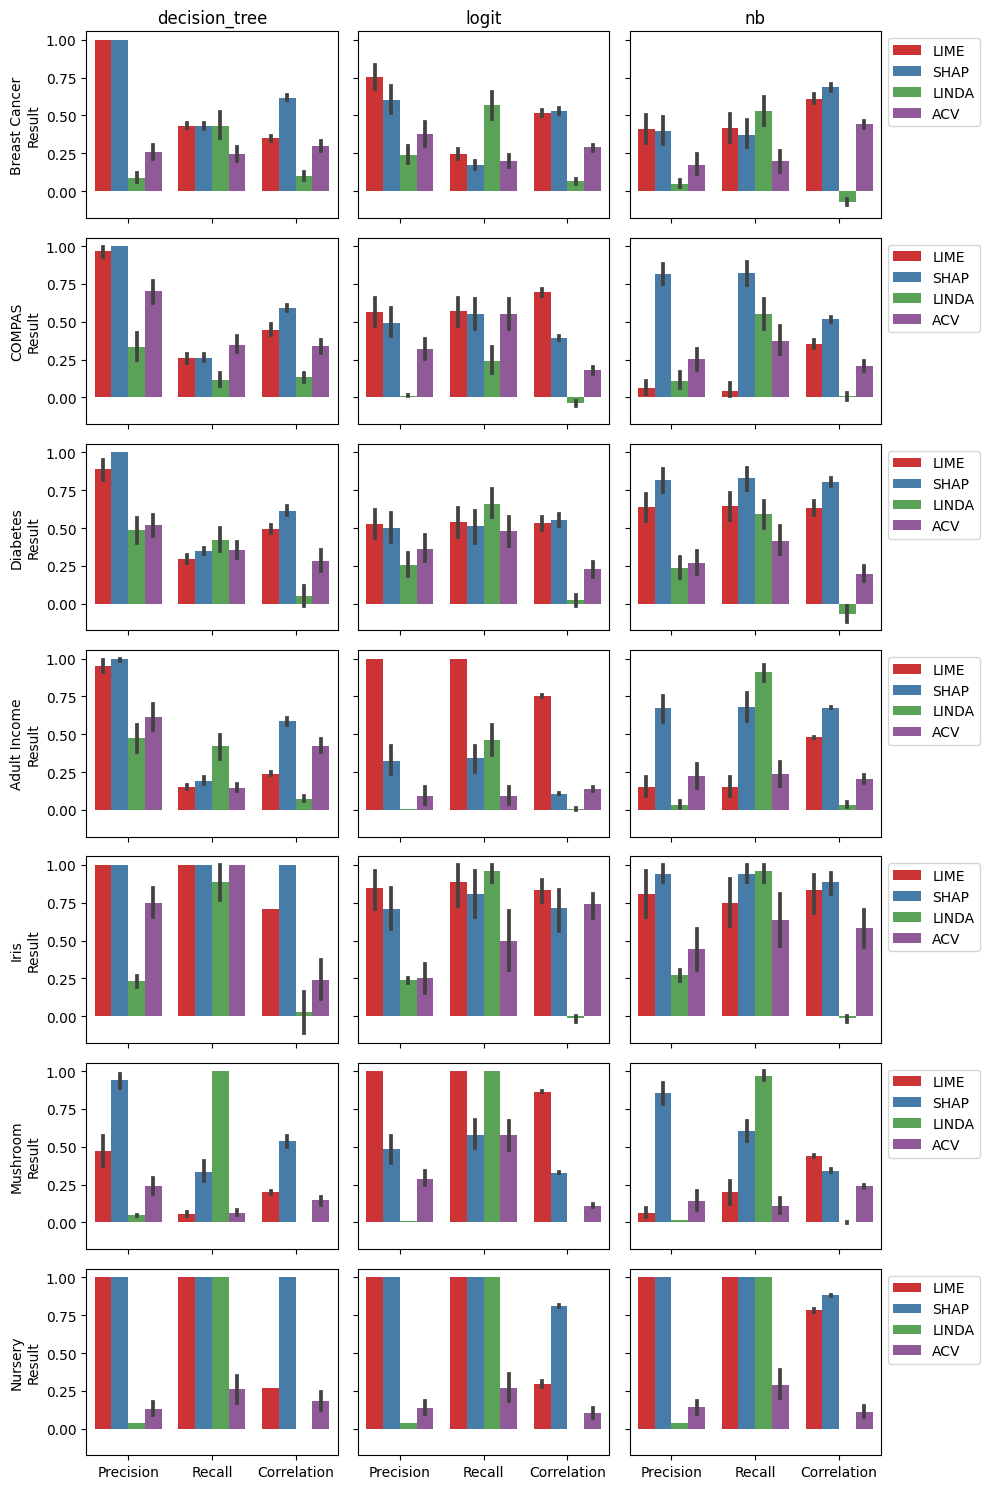

In [14]:
cls_data = list(cls_results.Dataset.unique())
cls_models = list(cls_results.Model.unique())

fig, axes = plt.subplots(len(cls_data), len(cls_models), sharex=True, sharey=True, figsize=(10, 15))

grouped = cls_results.groupby(["Dataset", "Model"])

for index, group in grouped:
    dataset = index[0]
    model = index[1]
    d = cls_data.index(dataset)
    m = cls_models.index(model)
    
    
    cols = list(np.copy(all_cls_cols))
    cols.append("Model")
    
    fixed_group = group[cols]
    fixed_group = fixed_group.dropna(1)
    
    res_name = "Average Result for "+dataset
    data = fixed_group.melt(id_vars = "Model", var_name="Metric", value_name = res_name)
    xai_names = data["Metric"].values.tolist()
    metric_names = [0]*data.shape[0]
    for i in range(len(xai_names)):
        name = xai_names[i]
        xai_names[i] = name.split(" ")[0]
        metric_names[i] = name.split(" ")[1]
    data["XAI"] = xai_names
    data["Metric Name"] = metric_names
    
    g = sns.barplot(x = data["Metric Name"].values, y=data[res_name].values, hue=data["XAI"], ax=axes[d][m])
    
    if m<len(cls_models)-1:
        g.legend_.remove()
    else:
        axes[d][m].legend(loc='upper left', bbox_to_anchor=(1, 1))
        
for ax, row in zip(axes[:,0], cls_data):
    ax.set_ylabel(row+"\nResult")
    
for ax, col in zip(axes[0], cls_models):
    ax.set_title(col)
    
for ax in axes[-1]:
    ax.set_xticklabels(["Precision", "Recall", "Correlation"], rotation=0)
    
fig.tight_layout()
plt.show()


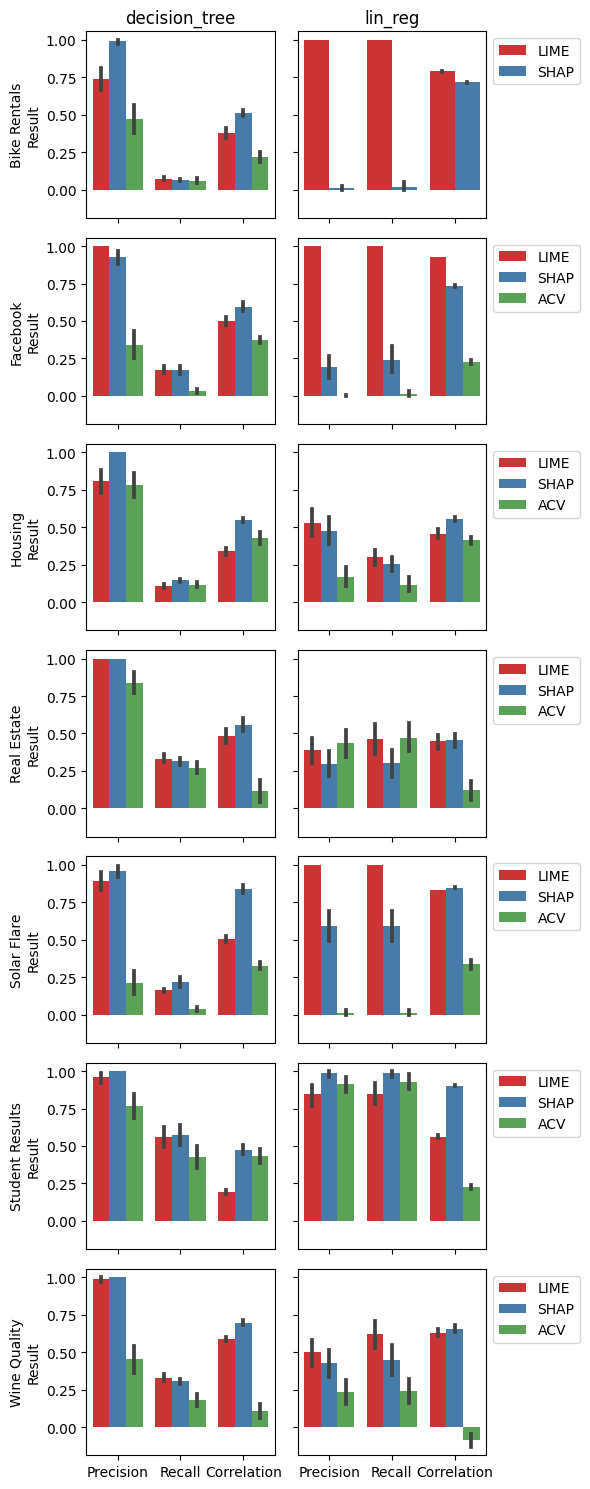

In [15]:
reg_data = list(reg_results.Dataset.unique())
reg_models = list(reg_results.Model.unique())

fig, axes = plt.subplots(len(reg_data), len(reg_models), sharex=True, sharey=True, figsize=(6, 15))

grouped = reg_results.groupby(["Dataset", "Model"])

for index, group in grouped:
    dataset = index[0]
    model = index[1]
    d = reg_data.index(dataset)
    m = reg_models.index(model)
    
    
    cols = list(np.copy(all_reg_cols))
    cols.append("Model")
    
    fixed_group = group[cols]
    fixed_group = fixed_group.dropna(1)
    
    res_name = "Average Result for "+dataset
    data = fixed_group.melt(id_vars = "Model", var_name="Metric", value_name = res_name)
    xai_names = data["Metric"].values.tolist()
    metric_names = [0]*data.shape[0]
    for i in range(len(xai_names)):
        name = xai_names[i]
        xai_names[i] = name.split(" ")[0]
        metric_names[i] = name.split(" ")[1]
    data["XAI"] = xai_names
    data["Metric Name"] = metric_names
    
    g = sns.barplot(x = data["Metric Name"].values, y=data[res_name].values, hue=data["XAI"], ax=axes[d][m])
    
    if m<len(reg_models)-1:
        g.legend_.remove()
    else:
        axes[d][m].legend(loc='upper left', bbox_to_anchor=(1, 1))
        
for ax, row in zip(axes[:,0], reg_data):
    ax.set_ylabel(row+"\nResult")
    
for ax, col in zip(axes[0], reg_models):
    ax.set_title(col)
    
for ax in axes[-1]:
    ax.set_xticklabels(["Precision", "Recall", "Correlation"], rotation=0)
    
fig.tight_layout()
plt.show()


# Significance Tests

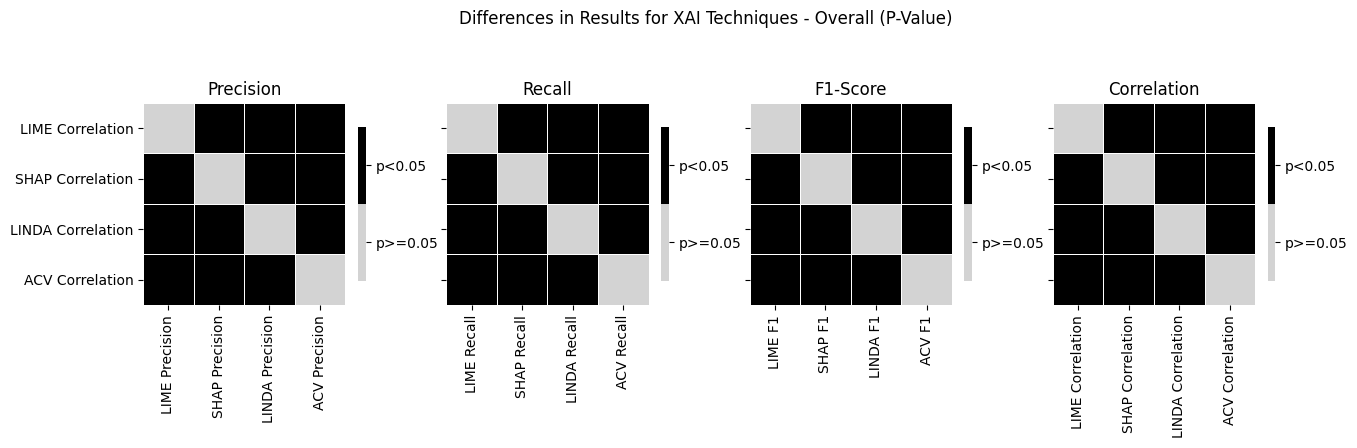

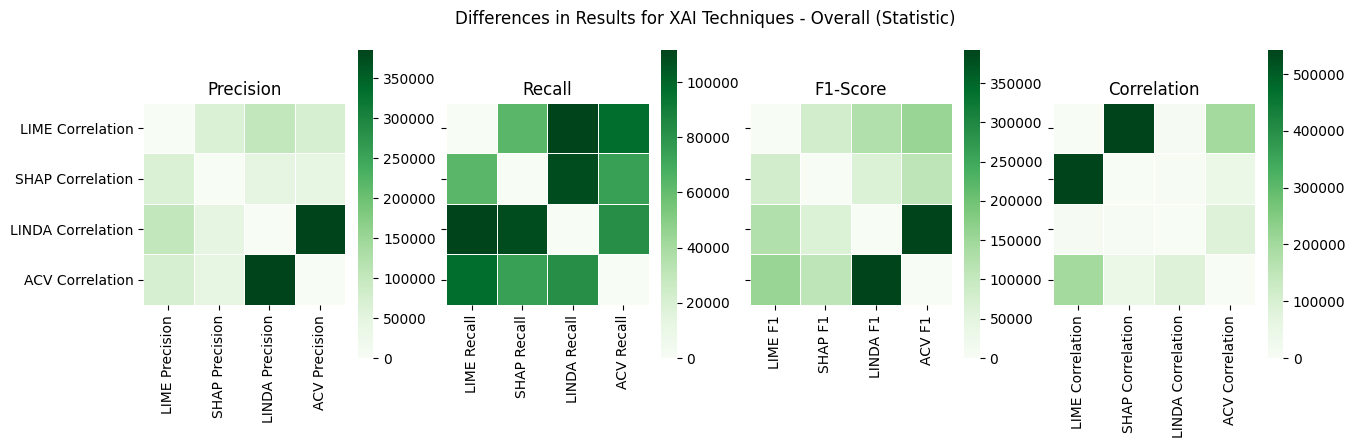

In [16]:
metrics = [cls_precision_columns, cls_recall_columns, cls_f1_columns, cls_corr_columns]
fig, ax = plt.subplots(1, len(metrics), sharey=True, figsize=(15, 4))
fig2, ax2 = plt.subplots(1, len(metrics), sharey=True, figsize=(15, 4))
metric_name = ["Precision", "Recall", "F1-Score", "Correlation"]

colors = ["lightgray", "black"] 
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

df_list = []

cls_results = cls_results.fillna(0)

for i in range(len(metrics)):
    pval_mat = np.zeros((len(metrics), len(metrics)))
    stat_mat = np.zeros((len(metrics), len(metrics)))
    ind = np.diag_indices_from(pval_mat)
    pval_mat[ind] = 1
    
    metric_df = []
    
    for comb in itertools.combinations(metrics[i], 2):
        res = scipy.stats.wilcoxon(cls_results[comb[0]], cls_results[comb[1]], method="approx")
        l1 = list(metrics[i]).index(comb[0])
        l2 = list(metrics[i]).index(comb[1])
        
        pval = res.pvalue
        statistic = res.statistic
        zstatistic = res.zstatistic
        
        pval_mat[l1][l2] = pval
        pval_mat[l2][l1] = pval
        
        stat_mat[l1][l2] = statistic
        stat_mat[l2][l1] = statistic
        
        metric_df.append([comb[0], comb[1], round(statistic), round(zstatistic, 2), round(pval, 2)])
        
    mask = np.triu(pval_mat)
    sig = np.where(pval_mat<0.05, 1, 0)

    hmp=sns.heatmap(sig, square=True, annot=False, cmap=cmap, linewidths=0.5, cbar_kws={"shrink": .5}, 
                xticklabels = metrics[i], yticklabels = metrics[i], ax = ax[i])
    
    sns.heatmap(stat_mat, square = True, annot=False, linewidths = 0.5, cmap="Greens", 
               xticklabels = metrics[i], yticklabels = metrics[i], ax = ax2[i])


    colorbar = hmp.collections[0].colorbar
    colorbar.set_ticks([0.25,0.75])
    colorbar.set_ticklabels(['p>=0.05', 'p<0.05' ])
    
    ax[i].title.set_text(metric_name[i])
    ax2[i].title.set_text(metric_name[i])
   
    for entry in metric_df:
        xai1 = entry[0]
        xai2 = entry[1]
        entry[0] = xai1.split(" ")[0]
        entry[1] = xai2.split(" ")[0]
        
    metric_df = pd.DataFrame(metric_df, columns = ["XAI1", "XAI2", metric_name[i]+" Test Statistic", 
                                                   metric_name[i]+" Z", metric_name[i]+" P-Value"])
    metric_df = metric_df.set_index(["XAI1", "XAI2"])
    df_list.append(metric_df)

fig.suptitle("Differences in Results for XAI Techniques - Overall (P-Value)")
fig2.suptitle("Differences in Results for XAI Techniques - Overall (Statistic)")

plt.show()

In [17]:
df = pd.concat(df_list, axis=1, ignore_index=False, join="inner")
df[df.columns].round(1)#.set_index(["XAI1", "XAI2", "Metric"])

Precision Test Statistic  Precision Z  Precision P-Value  \
XAI1  XAI2                                                              
LIME  SHAP                      64472      -6.6000             0.0000   
      LINDA                    101122     -28.8000             0.0000   
      ACV                       73746     -25.5000             0.0000   
SHAP  LINDA                     47991     -31.6000             0.0000   
      ACV                       43307     -29.1000             0.0000   
LINDA ACV                      385472     -11.1000             0.0000   

             Recall Test Statistic  Recall Z  Recall P-Value  \
XAI1  XAI2                                                     
LIME  SHAP                   62995   -4.9000          0.0000   
      LINDA                 111778  -11.5000          0.0000   
      ACV                    97228  -15.4000          0.0000   
SHAP  LINDA                 108833   -8.1000          0.0000   
      ACV                    74658  -19.6000          0.0000   
LINDA ACV                    82189  -23.1000          0.0000   

             F1-Score Test Statistic  F1-Score Z  F1-Score P-Value  \
XAI1  XAI2                                                           
LIME  SHAP                     81245     -5.4000            0.0000   
      LINDA                   124550    -27.6000            0.0000   
      ACV                     155344    -20.9000            0.0000   
SHAP  LINDA                    62908    -30.8000            0.0000   
      ACV                     109395    -25.4000            0.0000   
LINDA ACV                     392239    -11.6000            0.0000   

             Correlation Test Statistic  Correlation Z  Correlation P-Value  
XAI1  XAI2                                                                   
LIME  SHAP                       542663       -12.9000               0.0000  
      LINDA                        9730       -37.1000               0.0000  
      ACV                        198713       -29.0000               0.0000  
SHAP  LINDA                        3148       -37.4000               0.0000  
      ACV                         46797       -35.5000               0.0000  
LINDA ACV                         83384       -29.7000               0.0000

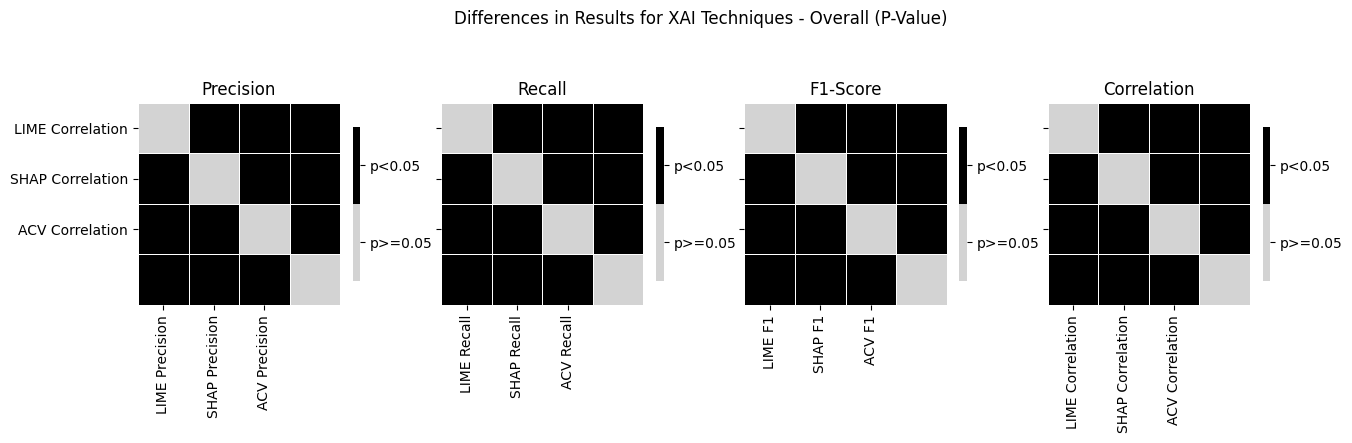

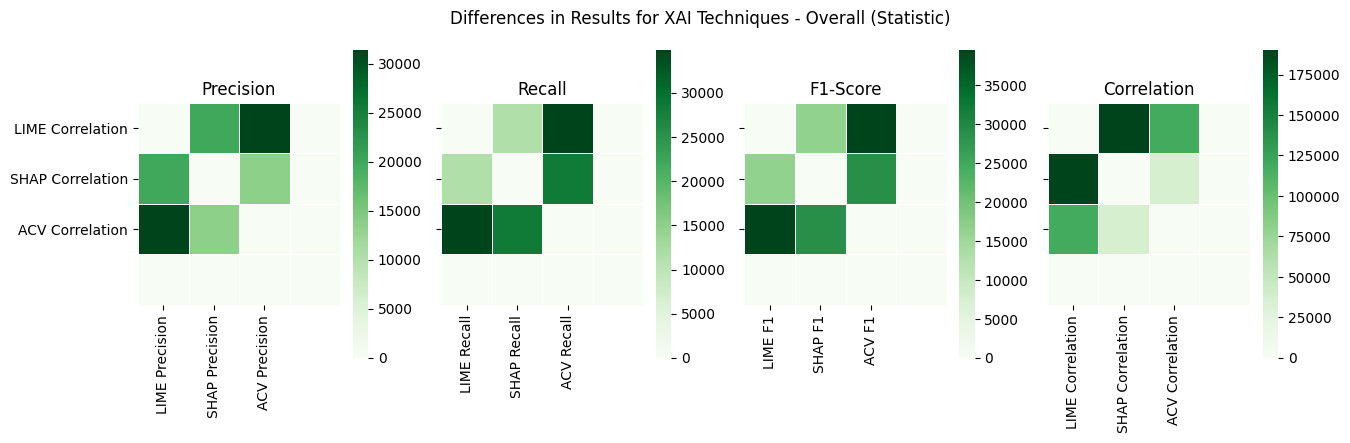

In [18]:
metrics = [reg_precision_columns, reg_recall_columns, reg_f1_columns, reg_corr_columns]
fig, ax = plt.subplots(1, len(metrics), sharey=True, figsize=(15, 4))
fig2, ax2 = plt.subplots(1, len(metrics), sharey=True, figsize=(15, 4))
metric_name = ["Precision", "Recall", "F1-Score", "Correlation"]

colors = ["lightgray", "black"] 
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

reg_results = reg_results.fillna(0)

df_list = []

for i in range(len(metrics)):
    pval_mat = np.zeros((len(metrics), len(metrics)))
    stat_mat = np.zeros((len(metrics), len(metrics)))
    ind = np.diag_indices_from(pval_mat)
    pval_mat[ind] = 1
    
    metric_df = []
    
    for comb in itertools.combinations(metrics[i], 2):
        res = scipy.stats.wilcoxon(reg_results[comb[0]], reg_results[comb[1]], method="approx")
        l1 = list(metrics[i]).index(comb[0])
        l2 = list(metrics[i]).index(comb[1])
        
        pval = res.pvalue
        statistic = res.statistic
        zstatistic = res.zstatistic
        
        pval_mat[l1][l2] = pval
        pval_mat[l2][l1] = pval
        
        stat_mat[l1][l2] = statistic
        stat_mat[l2][l1] = statistic
        
        metric_df.append([comb[0], comb[1], round(statistic), round(zstatistic, 2), round(pval, 2)])
        
    mask = np.triu(pval_mat)
    sig = np.where(pval_mat<0.05, 1, 0)

    hmp=sns.heatmap(sig, square=True, annot=False, cmap=cmap, linewidths=0.5, cbar_kws={"shrink": .5}, 
                xticklabels = metrics[i], yticklabels = metrics[i], ax = ax[i])
    
    sns.heatmap(stat_mat, square = True, annot=False, linewidths = 0.5, cmap="Greens", 
               xticklabels = metrics[i], yticklabels = metrics[i], ax = ax2[i])


    colorbar = hmp.collections[0].colorbar
    colorbar.set_ticks([0.25,0.75])
    colorbar.set_ticklabels(['p>=0.05', 'p<0.05' ])
    
    ax[i].title.set_text(metric_name[i])
    ax2[i].title.set_text(metric_name[i])
   
    for entry in metric_df:
        xai1 = entry[0]
        xai2 = entry[1]
        entry[0] = xai1.split(" ")[0]
        entry[1] = xai2.split(" ")[0]
        
    metric_df = pd.DataFrame(metric_df, columns = ["XAI1", "XAI2", metric_name[i]+" Test Statistic", 
                                                   metric_name[i]+" Z Statistic", metric_name[i]+" P-Value"])
    metric_df = metric_df.set_index(["XAI1", "XAI2"])
    df_list.append(metric_df)

fig.suptitle("Differences in Results for XAI Techniques - Overall (P-Value)")
fig2.suptitle("Differences in Results for XAI Techniques - Overall (Statistic)")

plt.show()

In [19]:
df = pd.concat(df_list, axis=1, ignore_index=False, join="inner")
df[df.columns].round(1)#.set_index(["XAI1", "XAI2", "Metric"])

Precision Test Statistic  Precision Z Statistic  Precision P-Value  \
XAI1 XAI2                                                                       
LIME SHAP                     19874                -9.8000             0.0000   
     ACV                      31400               -22.0000             0.0000   
SHAP ACV                      13599               -18.5000             0.0000   

           Recall Test Statistic  Recall Z Statistic  Recall P-Value  \
XAI1 XAI2                                                              
LIME SHAP                  11408            -13.5000          0.0000   
     ACV                   34864            -19.6000          0.0000   
SHAP ACV                   28498            -13.3000          0.0000   

           F1-Score Test Statistic  F1-Score Z Statistic  F1-Score P-Value  \
XAI1 XAI2                                                                    
LIME SHAP                    16542              -13.1000            0.0000   
     ACV                     39536              -20.2000            0.0000   
SHAP ACV                     29000              -14.4000            0.0000   

           Correlation Test Statistic  Correlation Z Statistic  \
XAI1 XAI2                                                        
LIME SHAP                      190176                 -17.9000   
     ACV                       118162                 -24.6000   
SHAP ACV                        36792                 -30.0000   

           Correlation P-Value  
XAI1 XAI2                       
LIME SHAP               0.0000  
     ACV                0.0000  
SHAP ACV                0.0000